In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df = pd.read_csv('final cleaned dataset.csv', index_col='datetime')
df

,main.temp,main.pressure,main.humidity,clouds.all,wind.speed,weather.Clear,weather.Clouds,weather.Mist,weather.Rain,weather.Smoke
datetime,,,,,,,,,,
2023-11-06 15:45:57,33.36,1010.0,68.0,20.0,4.02,0.0,1.0,0.0,0.0,0.0
2023-11-06 15:47:35,30.00,1009.0,74.0,81.0,2.06,0.0,1.0,0.0,0.0,0.0
2023-11-06 15:38:29,33.32,1010.0,66.0,20.0,2.57,0.0,1.0,0.0,0.0,0.0
2023-11-06 15:39:56,33.33,1010.0,66.0,50.0,0.89,0.0,1.0,0.0,0.0,0.0
2023-11-06 18:01:20,31.10,1010.0,72.0,20.0,4.12,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2024-05-31 18:10:02,32.04,1011.0,78.0,65.0,1.79,0.0,1.0,0.0,0.0,0.0
2024-05-31 21:06:54,30.73,1013.0,80.0,100.0,2.68,0.0,1.0,0.0,0.0,0.0
2024-05-31 21:08:22,28.21,1013.0,86.0,47.0,1.63,0.0,1.0,0.0,0.0,0.0


In [2]:

# Separate features (except temperature) into weather_x
camanava_x = df.drop(columns=['main.temp'])

# Separate temperature column into weather_y
camanava_y = df[['main.temp']]

# Display the shapes of the new DataFrames
print("Shape of camanava_x:", camanava_x.shape)
print("Shape of camanava_y:", camanava_y.shape)
#camanava_y.head()


Shape of camanava_x: (5539, 9)
Shape of camanava_y: (5539, 1)


In [3]:
camanava_x.columns

Index(['main.pressure', 'main.humidity', 'clouds.all', 'wind.speed',
       'weather.Clear', 'weather.Clouds', 'weather.Mist', 'weather.Rain',
       'weather.Smoke'],
      dtype='object')

Index(['main.pressure', 'main.humidity', 'clouds.all', 'wind.speed',
       'weather.Clear', 'weather.Clouds', 'weather.Mist', 'weather.Rain',
       'weather.Smoke'],
      dtype='object')


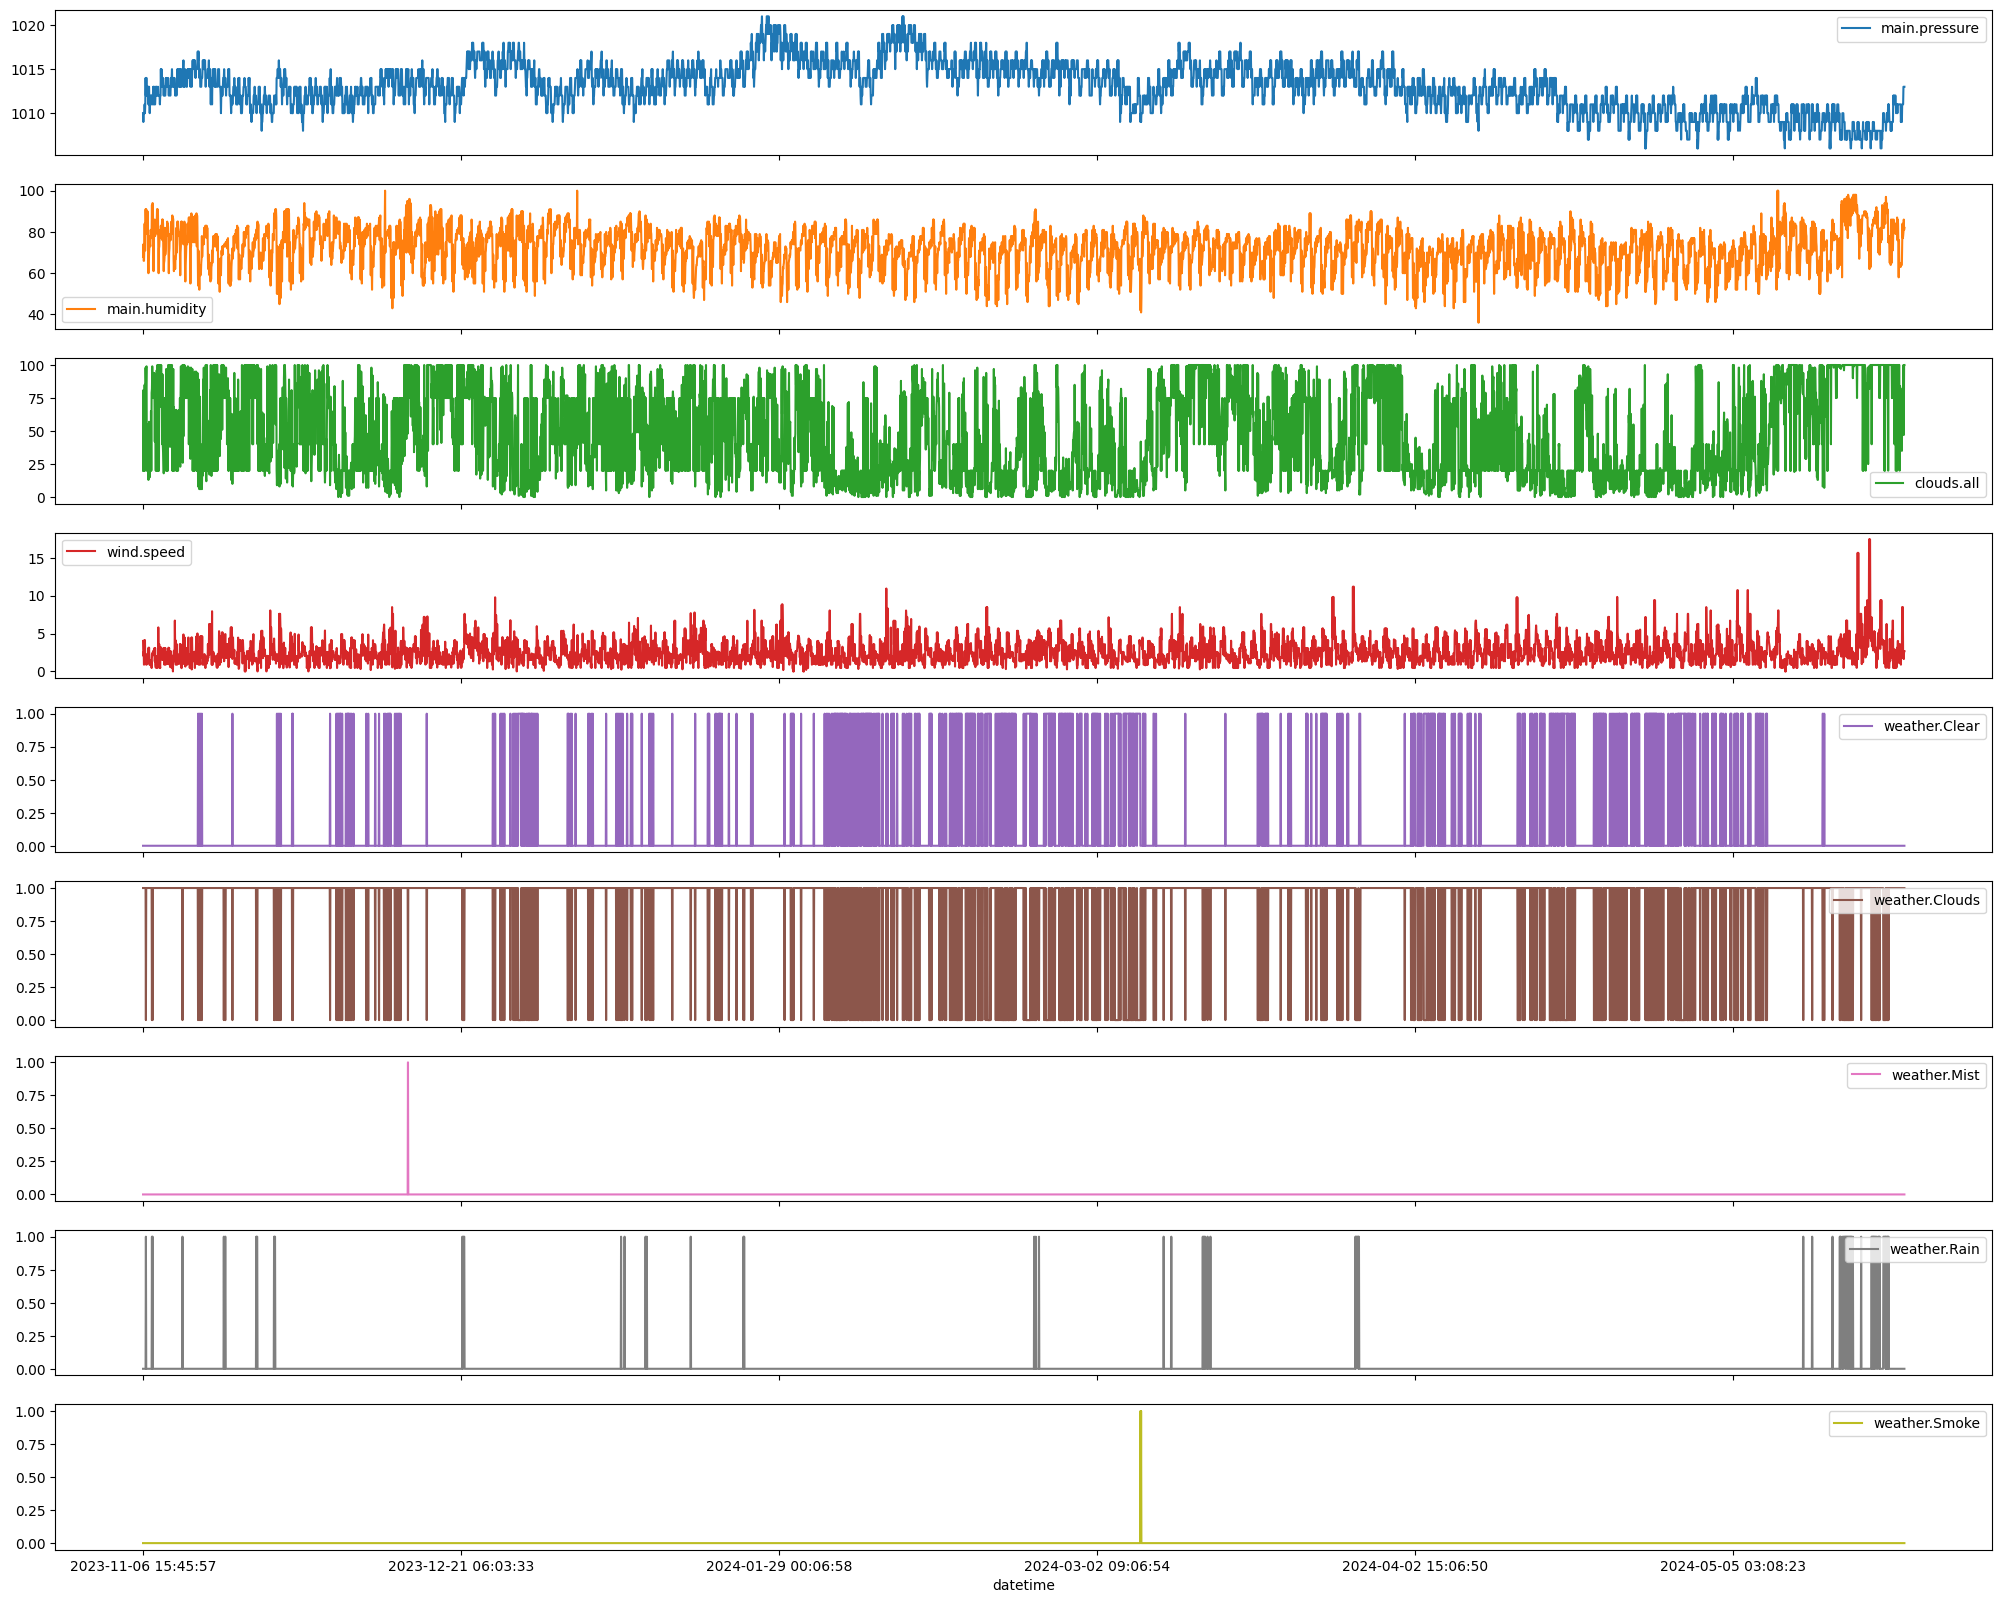

In [4]:
import matplotlib.pyplot as plt
camanava_xnum = camanava_x.apply(pd.to_numeric, errors='ignore')
# Select only numerical features 
camanava_features = camanava_xnum .select_dtypes(include=['float64', 'int64'])
print(camanava_features.columns)
# Plot all features in separate subplots
camanava_features .plot(subplots=True, figsize=(25, 20))
plt.show()


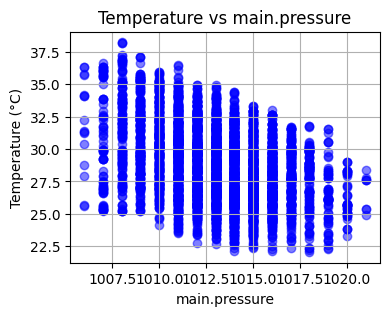

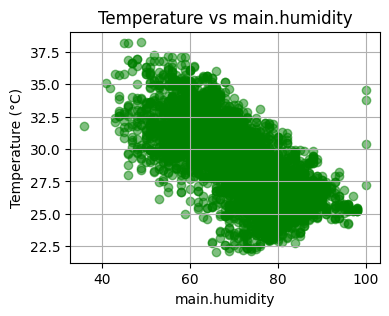

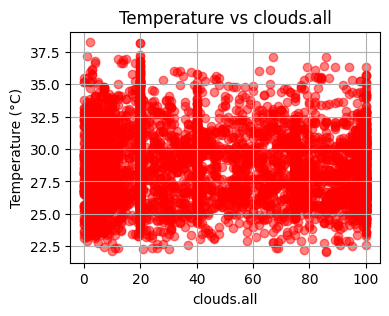

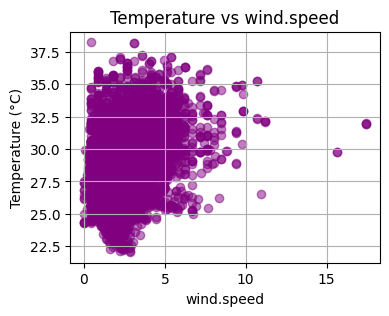

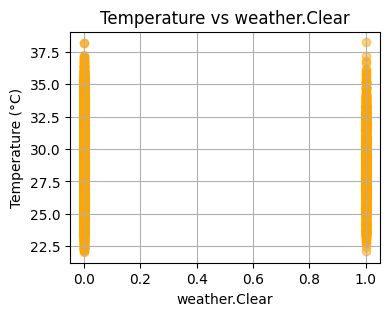

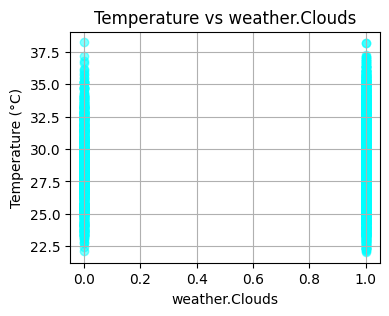

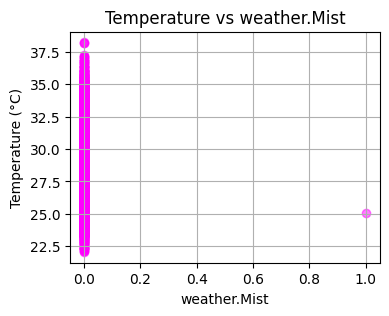

IndexError: list index out of range

<Figure size 400x300 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt

colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta']

# Create a scatter plot for each feature against temperature
for i, feature in enumerate(camanava_x.columns):
    plt.figure(figsize=(4, 3))
    plt.scatter(camanava_x[feature], camanava_y.values, alpha=0.5, color=colors[i])
    plt.title(f'Temperature vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.show()


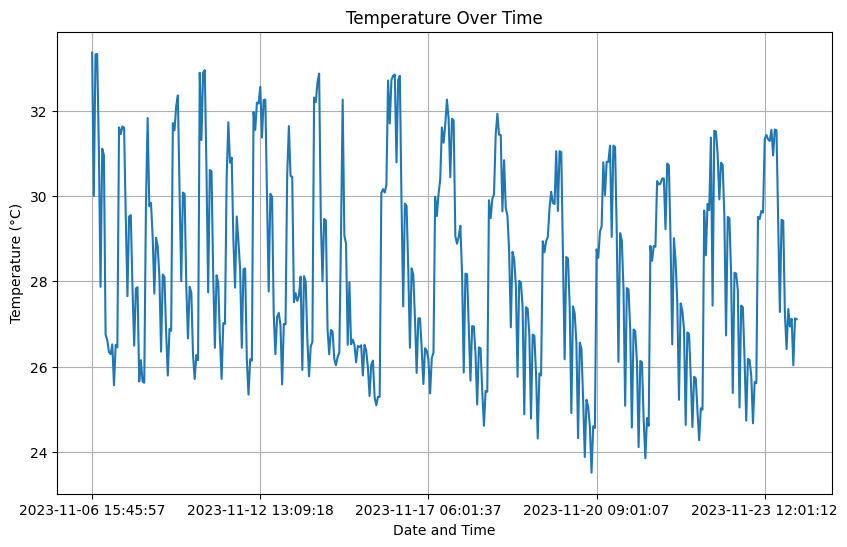

In [ ]:

# Plot temperature and datetime
camanava_y.plot(figsize=(10, 6), legend=False)
plt.title('Temperature Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


# Multiple Linear Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(camanava_x, camanava_y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)



In [ ]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)


Shape of y_test: (84, 1)
Shape of y_pred: (84, 1)


In [ ]:
#  Actual and Predicted values along with their differences
results1 = pd.DataFrame({
    'Actual': y_test.values.flatten(), 
    'Predicted': y_pred.flatten(), 
    'Difference': (y_test.values - y_pred).flatten()
    })
print("Actual vs Predicted:")
results1.index = X_test.index  
results1


Actual vs Predicted:


,Actual,Predicted,Difference
datetime,,,
2023-11-15 06:03:27,26.03,28.064210,-2.034210
2023-11-21 09:03:25,28.83,29.125454,-0.295454
2023-11-16 09:04:58,30.26,28.629260,1.630740
2023-11-22 12:02:50,27.43,29.219645,-1.789645
2023-11-24 00:01:24,27.12,24.911575,2.208425
...,...,...,...
2023-11-23 18:01:19,29.44,27.143188,2.296812
2023-11-10 00:03:19,26.66,26.877731,-0.217731
2023-11-23 18:05:07,29.42,27.845719,1.574281


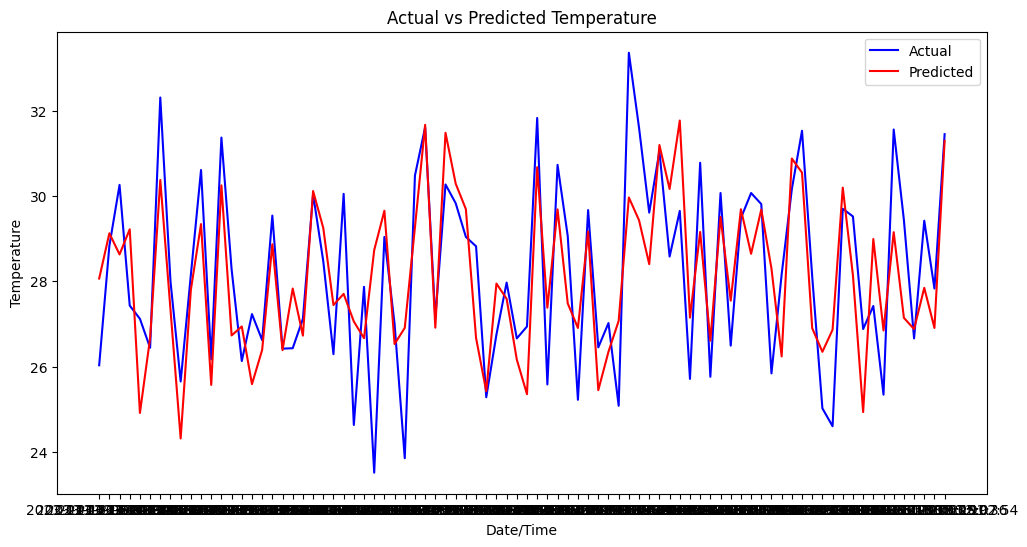

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))


plt.plot(results1.index, results1['Actual'], color='blue', label='Actual')
plt.plot(results1.index, results1['Predicted'], color='red', label='Predicted')


plt.xlabel('Date/Time')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()


plt.show()


In [ ]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 2.2904668356797253


# Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
import numpy as np
y_pred2=regressor.predict(X_test)
y_pred2

array([25.79 , 28.83 , 30.08 , 31.54 , 26.205, 24.57 , 32.26 , 25.71 ,
       25.65 , 28.14 , 30.61 , 26.87 , 33.32 , 25.42 , 25.455, 26.51 ,
       27.74 , 24.61 , 28.11 , 29.43 , 28.295, 30.01 , 31.29 , 25.23 ,
       29.03 , 24.67 , 27.525, 25.11 , 29.29 , 28.29 , 24.32 , 30.47 ,
       31.67 , 28.295, 30.02 , 32.08 , 29.06 , 27.83 , 25.29 , 26.75 ,
       26.99 , 26.17 , 26.47 , 29.22 , 26.45 , 31.11 , 28.12 , 25.05 ,
       30.43 , 25.62 , 26.17 , 24.57 , 29.13 , 29.29 , 24.61 , 31.05 ,
       28.57 , 31.31 , 24.32 , 30.43 , 26.03 , 30.05 , 24.67 , 28.95 ,
       30.08 , 29.66 , 25.84 , 28.11 , 28.94 , 29.51 , 28.12 , 25.64 ,
       24.6  , 29.84 , 26.11 , 26.81 , 27.41 , 24.57 , 31.54 , 24.73 ,
       24.32 , 26.1  , 27.83 , 30.95 ])

In [ ]:
import pandas as pd

# Calculate the differences between actual and predicted values
differences = y_test.values.flatten() - y_pred2.flatten()

# Create a DataFrame with actual, predicted values, and their differences
results2 = pd.DataFrame({
    'Actual': y_test.values.flatten(), 
    'Predicted': y_pred2.flatten(), 
    'Difference': differences
})

# Print the DataFrame
print("Actual vs Predicted:")
results2.index = X_test.index
results2


Actual vs Predicted:


,Actual,Predicted,Difference
datetime,,,
2023-11-15 06:03:27,26.03,25.790,0.240
2023-11-21 09:03:25,28.83,28.830,0.000
2023-11-16 09:04:58,30.26,30.080,0.180
2023-11-22 12:02:50,27.43,31.540,-4.110
2023-11-24 00:01:24,27.12,26.205,0.915
...,...,...,...
2023-11-23 18:01:19,29.44,24.730,4.710
2023-11-10 00:03:19,26.66,24.320,2.340
2023-11-23 18:05:07,29.42,26.100,3.320


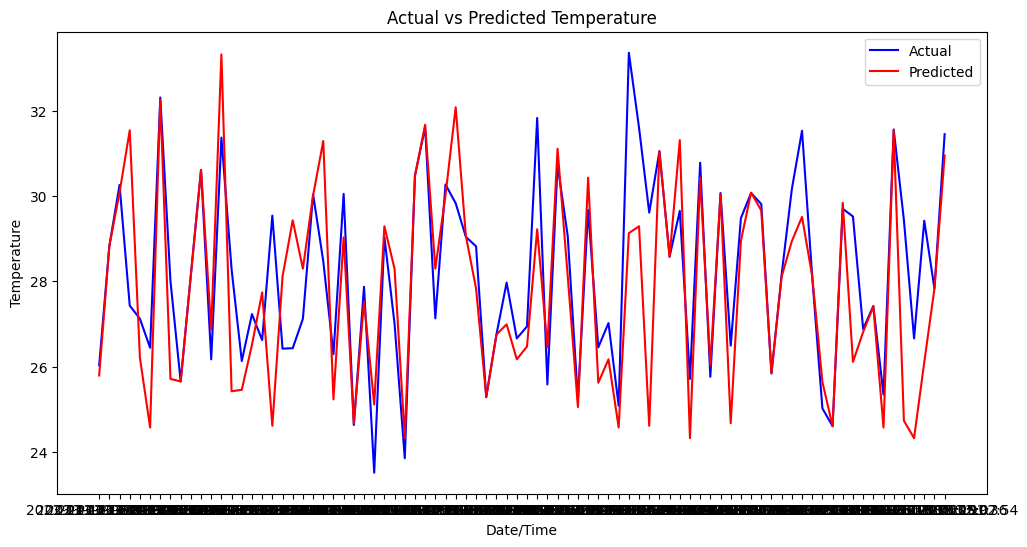

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))


plt.plot(results2.index, results2['Actual'], color='blue', label='Actual')
plt.plot(results2.index, results2['Predicted'], color='red', label='Predicted')


plt.xlabel('Date/Time')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()


plt.show()


In [ ]:
mse = mean_squared_error(y_test, y_pred2)

print("Decision Tree Regression - Mean Squared Error:", mse)

Decision Tree Regression - Mean Squared Error: 2.7044741071428566


# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor(random_state=0)
random_forest_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred3 = random_forest_regressor.predict(X_test)


In [ ]:
import pandas as pd

# Calculate the differences between actual and predicted values
differences = y_test.values.flatten() - y_pred3.flatten()

# Create a DataFrame with actual, predicted values, and their differences
results3 = pd.DataFrame({
    'Actual': y_test.values.flatten(), 
    'Predicted': y_pred3.flatten(), 
    'Difference': differences
})

# Print the DataFrame
print("Actual vs Predicted:")
results3.index = X_test.index
results3


Actual vs Predicted:


,Actual,Predicted,Difference
datetime,,,
2023-11-15 06:03:27,26.03,26.434100,-0.404100
2023-11-21 09:03:25,28.83,28.670000,0.160000
2023-11-16 09:04:58,30.26,30.562600,-0.302600
2023-11-22 12:02:50,27.43,30.869767,-3.439767
2023-11-24 00:01:24,27.12,26.669083,0.450917
...,...,...,...
2023-11-23 18:01:19,29.44,26.061900,3.378100
2023-11-10 00:03:19,26.66,25.810700,0.849300
2023-11-23 18:05:07,29.42,27.351233,2.068767


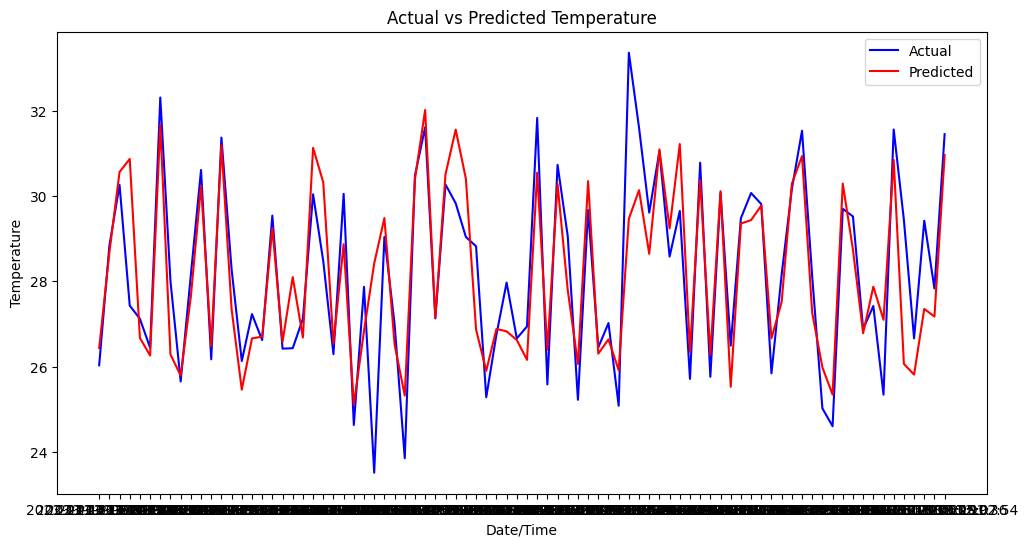

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))


plt.plot(results1.index, results3['Actual'], color='blue', label='Actual')
plt.plot(results1.index, results3['Predicted'], color='red', label='Predicted')


plt.xlabel('Date/Time')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()


plt.show()


In [ ]:
mse = mean_squared_error(y_test, y_pred3)

print("Random Tree Regression - Mean Squared Error:", mse)

Random Tree Regression - Mean Squared Error: 1.4430887869374995
